In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
train_df = pd.read_csv('D:/ResearchIdeas/0.BreastCancer/archive/csv/mass_case_description_train_set.csv')
train_df = train_df.reset_index(drop=True)
train_df

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [3]:
test_df = pd.read_csv('D:/ResearchIdeas/0.BreastCancer/archive/csv/mass_case_description_test_set.csv')
test_df = test_df.reset_index(drop=True)
test_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


### 2. Data preparation and data cleaning

In [4]:
train_df = train_df.drop(columns=['patient_id','abnormality type', 'image file path', 'cropped image file path','ROI mask file path'], errors='ignore')
test_df = test_df.drop(columns=['patient_id','abnormality type', 'image file path', 'cropped image file path','ROI mask file path'], errors='ignore')

train_df

,breast_density,left or right breast,image view,abnormality id,mass shape,mass margins,assessment,pathology,subtlety
0,3,LEFT,CC,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
1,3,LEFT,MLO,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
2,3,LEFT,CC,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
3,3,LEFT,MLO,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
4,3,RIGHT,MLO,1,OVAL,CIRCUMSCRIBED,4,BENIGN,5
...,...,...,...,...,...,...,...,...,...
1313,2,RIGHT,MLO,1,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4
1314,2,RIGHT,CC,1,ROUND,SPICULATED,3,MALIGNANT,5
1315,2,RIGHT,MLO,1,ROUND,SPICULATED,3,MALIGNANT,5
1316,2,LEFT,CC,1,IRREGULAR,SPICULATED,3,MALIGNANT,2


In [5]:
def apply_category(train_df, test_df):
    # Replace spaces with underscores in column names for both dataframes
    train_df.columns = [col.replace(' ', '_') for col in train_df.columns]
    test_df.columns = [col.replace(' ', '_') for col in test_df.columns]

    # Convert specified columns to 'category' type for both dataframes
    categorical_columns = ['left_or_right_breast', 'image_view', 'mass_margins', 'mass_shape', 'pathology']
    
    for col in categorical_columns:
        if col in train_df.columns:
            train_df[col] = train_df[col].astype('category')
        if col in test_df.columns:
            test_df[col] = test_df[col].astype('category')
    
    return train_df, test_df

# Applying the function
train_df, test_df = apply_category(train_df, test_df)
train_df.head()


,breast_density,left_or_right_breast,image_view,abnormality_id,mass_shape,mass_margins,assessment,pathology,subtlety
0,3,LEFT,CC,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
1,3,LEFT,MLO,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
2,3,LEFT,CC,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
3,3,LEFT,MLO,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
4,3,RIGHT,MLO,1,OVAL,CIRCUMSCRIBED,4,BENIGN,5


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   breast_density        1318 non-null   int64   
 1   left_or_right_breast  1318 non-null   category
 2   image_view            1318 non-null   category
 3   abnormality_id        1318 non-null   int64   
 4   mass_shape            1314 non-null   category
 5   mass_margins          1275 non-null   category
 6   assessment            1318 non-null   int64   
 7   pathology             1318 non-null   category
 8   subtlety              1318 non-null   int64   
dtypes: category(5), int64(4)
memory usage: 49.5 KB


### EDA

In [7]:
from skimpy import skim

In [8]:
skim(train_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 1318   │ │ category    │ 5     │ │ left_or_right_breast  │                                │
│ │ Number of columns │ 9      │ │ int32       │ 4     │ │ image_view            │                                │
│ └───────────────────┴────────┘ └─────────────┴───────┘ │ mass_shape            │                                │
│                                                        │ mass_margins          │                                │
│                                                        │ pathology             │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ mean     ┃ sd        ┃ p0  ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ breast_density       │    0 │      0 │    2.203 │    0.8738 │   1 │     2 │     2 │    3 │     4 │ ▃ ▇ ▅▁  │  │
│ │ abnormality_id       │    0 │      0 │    1.116 │     0.467 │   1 │     1 │     1 │    1 │     6 │    ▇    │  │
│ │ assessment           │    0 │      0 │    3.505 │     1.415 │   0 │     3 │     4 │    4 │     5 │ ▂ ▁▅▇▅  │  │
│ │ subtlety             │    0 │      0 │    3.966 │     1.102 │   0 │     3 │     4 │    5 │     5 │  ▁▁▃▆▇  │  │
│ └──────────────────────┴──────┴────────┴──────────┴───────────┴─────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                                   ┃ NA      ┃ NA %        ┃ ordered           ┃ unique         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ left_or_right_breast                          │       0 │           0 │ False             │              2 │  │
│ │ image_view                                    │       0 │           0 │ False             │              2 │  │
│ │ mass_shape                                    │       4 │         0.3 │ False             │             19 │  │
│ │ mass_margins                                  │      43 │        3.26 │ False             │             16 │  │
│ │ pathology                                     │       0 │           0 │ False             │              3 │  │
│ └───────────────────────────────────────────────┴─────────┴─────────────┴───────────────────┴────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
train_df['mass_shape'] = train_df['mass_shape'].bfill()
train_df['mass_margins'] = train_df['mass_margins'].bfill()

test_df['mass_margins'] = test_df['mass_margins'].bfill()

print(train_df.isna().sum())

breast_density          0
left_or_right_breast    0
image_view              0
abnormality_id          0
mass_shape              0
mass_margins            0
assessment              0
pathology               0
subtlety                0
dtype: int64


bfill-backward fill, missing values will be filled with the next valid (non-NaN) value found below 

In [10]:
numerical = ['breast_density','abnormality_id','assessment','subtlety']
categorical = ['left_or_right_breast','image_view','mass_shape','mass_margins']

In [11]:
subtlety_counts = train_df['subtlety'].value_counts()
subtlety_counts 

subtlety
5    543
4    375
3    257
2    100
1     41
0      2
Name: count, dtype: int64

In [12]:
valid_subtlety = subtlety_counts[subtlety_counts >= 41].index

# Filter train_df to include only rows with valid abnormality_id
train_df = train_df[train_df['subtlety'].isin(valid_subtlety)]

# Reset the index after filtering
train_df = train_df.reset_index(drop=True)

# Check the counts of the abnormality_id after filtering
print(train_df['subtlety'].value_counts())

subtlety
5    543
4    375
3    257
2    100
1     41
Name: count, dtype: int64


In [13]:
# Calculate the counts of each unique value in abnormality_id
abnormality_counts = train_df['abnormality_id'].value_counts()
abnormality_counts

abnormality_id
1    1214
2      68
3      23
4       7
5       2
6       2
Name: count, dtype: int64

In [14]:
# Get the values that meet the threshold of > 7
valid_abnormalities = abnormality_counts[abnormality_counts > 7].index

# Filter train_df to include only rows with valid abnormality_id
train_df = train_df[train_df['abnormality_id'].isin(valid_abnormalities)]

# Reset the index after filtering
train_df = train_df.reset_index(drop=True)

# Check the counts of the abnormality_id after filtering
print(train_df['abnormality_id'].value_counts())

abnormality_id
1    1214
2      68
3      23
Name: count, dtype: int64


In [15]:
mass_shape_counts = train_df['mass_shape'].value_counts()
mass_shape_counts

mass_shape
IRREGULAR                                   351
OVAL                                        323
LOBULATED                                   304
ROUND                                       118
ARCHITECTURAL_DISTORTION                     80
IRREGULAR-ARCHITECTURAL_DISTORTION           45
LYMPH_NODE                                   22
ASYMMETRIC_BREAST_TISSUE                     20
FOCAL_ASYMMETRIC_DENSITY                     19
OVAL-LYMPH_NODE                               5
LOBULATED-IRREGULAR                           5
LOBULATED-LYMPH_NODE                          3
ROUND-OVAL                                    3
LOBULATED-ARCHITECTURAL_DISTORTION            2
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY            2
LOBULATED-OVAL                                1
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION      1
ROUND-LOBULATED                               1
Name: count, dtype: int64

In [16]:
# Keep only the values with counts >= 19
valid_mass_shapes = mass_shape_counts[mass_shape_counts >= 19].index

train_df['mass_shape'] = train_df['mass_shape'].str.strip()

# Filter the DataFrame to include only rows with valid mass shapes
train_df = train_df.loc[train_df['mass_shape'].isin(valid_mass_shapes)]

# Reset the index after filtering
train_df = train_df.reset_index(drop=True)

print(train_df['mass_shape'].value_counts())

mass_shape
IRREGULAR                             351
OVAL                                  323
LOBULATED                             304
ROUND                                 118
ARCHITECTURAL_DISTORTION               80
IRREGULAR-ARCHITECTURAL_DISTORTION     45
LYMPH_NODE                             22
ASYMMETRIC_BREAST_TISSUE               20
FOCAL_ASYMMETRIC_DENSITY               19
Name: count, dtype: int64


In [17]:
mass_margins_counts = train_df['mass_margins'].value_counts()
mass_margins_counts

mass_margins
SPICULATED                               299
CIRCUMSCRIBED                            285
ILL_DEFINED                              284
OBSCURED                                 201
MICROLOBULATED                           113
CIRCUMSCRIBED-ILL_DEFINED                 27
ILL_DEFINED-SPICULATED                    26
CIRCUMSCRIBED-OBSCURED                    16
OBSCURED-ILL_DEFINED                      16
OBSCURED-ILL_DEFINED-SPICULATED            4
OBSCURED-SPICULATED                        4
CIRCUMSCRIBED-MICROLOBULATED               2
MICROLOBULATED-ILL_DEFINED                 2
MICROLOBULATED-ILL_DEFINED-SPICULATED      2
MICROLOBULATED-SPICULATED                  1
Name: count, dtype: int64

In [18]:
# Keep only the values with counts >= 16
valid_mass_margins = mass_margins_counts[mass_margins_counts >= 26].index

# Remove any leading/trailing whitespaces from mass_margins
train_df['mass_margins'] = train_df['mass_margins'].str.strip()

# Filter the DataFrame to include only rows with valid mass margins
train_df = train_df.loc[train_df['mass_margins'].isin(valid_mass_margins)]

# Reset the index after filtering
train_df = train_df.reset_index(drop=True)

# Check the updated counts of mass_margins values
print("Updated counts of mass_margins:")
print(train_df['mass_margins'].value_counts())

Updated counts of mass_margins:
mass_margins
SPICULATED                   299
CIRCUMSCRIBED                285
ILL_DEFINED                  284
OBSCURED                     201
MICROLOBULATED               113
CIRCUMSCRIBED-ILL_DEFINED     27
ILL_DEFINED-SPICULATED        26
Name: count, dtype: int64


In [19]:
print(train_df.shape)

(1235, 9)


In [20]:
unique_value_counts = {}

for column in train_df.columns:
    value_counts = train_df[column].value_counts()
    
    # Store the results in the dictionary
    unique_value_counts[column] = value_counts

# Display the unique values and their counts
for column, counts in unique_value_counts.items():
    print(counts)
    print()  

breast_density
2    556
3    306
1    272
4    101
Name: count, dtype: int64

left_or_right_breast
RIGHT    636
LEFT     599
Name: count, dtype: int64

image_view
MLO    662
CC     573
Name: count, dtype: int64

abnormality_id
1    1147
2      66
3      22
Name: count, dtype: int64

mass_shape
IRREGULAR                             337
OVAL                                  312
LOBULATED                             295
ROUND                                 117
ARCHITECTURAL_DISTORTION               80
IRREGULAR-ARCHITECTURAL_DISTORTION     34
LYMPH_NODE                             22
ASYMMETRIC_BREAST_TISSUE               20
FOCAL_ASYMMETRIC_DENSITY               18
Name: count, dtype: int64

mass_margins
SPICULATED                   299
CIRCUMSCRIBED                285
ILL_DEFINED                  284
OBSCURED                     201
MICROLOBULATED               113
CIRCUMSCRIBED-ILL_DEFINED     27
ILL_DEFINED-SPICULATED        26
Name: count, dtype: int64

assessment
4    495
5    297


In [21]:
def preprocess_dataframe(df, valid_mass_shapes, valid_mass_margins):
    
    # 2. Filter abnormality_id
    abnormality_counts = df['abnormality_id'].value_counts()
    valid_abnormalities = abnormality_counts[abnormality_counts >= 5].index
    df = df[df['abnormality_id'].isin(valid_abnormalities)]
    
    # 1. Filter mass_shape
    df['mass_shape'] = df['mass_shape'].str.strip()
    df = df[df['mass_shape'].isin(valid_mass_shapes)]
    
    # 2. Filter mass_margins
    df['mass_margins'] = df['mass_margins'].str.strip()
    df = df[df['mass_margins'].isin(valid_mass_margins)]
    
    # Reset the index after filtering
    df = df.reset_index(drop=True)
    
    return df

test_df = preprocess_dataframe(test_df, valid_mass_shapes, valid_mass_margins)

C:\Users\admin\AppData\Local\Temp\ipykernel_17812\4001861930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mass_shape'] = df['mass_shape'].str.strip()


In [22]:
# Initialize a dictionary to hold the unique values and their counts
unique_value_counts = {}

# Loop through each column in the DataFrame
for column in test_df.columns:
    # Get the unique values and their counts for the current column
    value_counts = test_df[column].value_counts()
    
    # Store the results in the dictionary
    unique_value_counts[column] = value_counts

# Display the unique values and their counts
for column, counts in unique_value_counts.items():
    print(counts)
    print()  # Blank line for better readability

breast_density
2    152
3    103
1     47
4     41
Name: count, dtype: int64

left_or_right_breast
RIGHT    174
LEFT     169
Name: count, dtype: int64

image_view
MLO    187
CC     156
Name: count, dtype: int64

abnormality_id
1    325
2     13
3      5
Name: count, dtype: int64

mass_shape
IRREGULAR                             104
OVAL                                   84
LOBULATED                              74
ROUND                                  40
ARCHITECTURAL_DISTORTION               22
IRREGULAR-ARCHITECTURAL_DISTORTION      6
FOCAL_ASYMMETRIC_DENSITY                6
ASYMMETRIC_BREAST_TISSUE                5
LYMPH_NODE                              2
Name: count, dtype: int64

mass_margins
ILL_DEFINED                  95
CIRCUMSCRIBED                89
SPICULATED                   81
OBSCURED                     51
MICROLOBULATED               20
ILL_DEFINED-SPICULATED        5
CIRCUMSCRIBED-ILL_DEFINED     2
Name: count, dtype: int64

assessment
4    157
3     77
5     69
0

In [23]:
train_df.pathology.value_counts(normalize=True)

pathology
MALIGNANT                  0.489069
BENIGN                     0.438057
BENIGN_WITHOUT_CALLBACK    0.072874
Name: proportion, dtype: float64

In [24]:
def map_pathology(train_df, test_df):
    # Normalize 'pathology' column by converting categories to strings, stripping spaces, and making uppercase
    for df in [train_df, test_df]:
        # Convert the 'pathology' column to string first, then apply string functions
        df['pathology'] = df['pathology'].astype(str).str.strip().str.upper()

        # Apply the mapping for pathology
        df['pathology'] = df['pathology'].map({
            'MALIGNANT': 1,
            'BENIGN': 0,
            'BENIGN_WITHOUT_CALLBACK': 0
        })

        # Check for any unmapped or NaN values in 'pathology' column
        if df['pathology'].isna().sum() > 0:
            print(f"There are unmapped values in 'pathology' for {df.name}. Here they are:")
            print(df[df['pathology'].isna()])

    return train_df, test_df

# Assign names to the dataframes for easier identification in print statements
train_df.name = "train_df"
test_df.name = "test_df"

# Apply the function to both train and test sets
train_df, test_df = map_pathology(train_df, test_df)
train_df.pathology.value_counts(normalize=True)

pathology
0    0.510931
1    0.489069
Name: proportion, dtype: float64

In [25]:
    global_pathology_train = train_df['pathology'].mean()
    global_pathology_test = test_df['pathology'].mean()
    print(f"Proportion of malignant cases in train set: {global_pathology_train}")
    print(f"Proportion of malignant cases in test set: {global_pathology_test}")

Proportion of malignant cases in train set: 0.48906882591093115
Proportion of malignant cases in test set: 0.39067055393586003


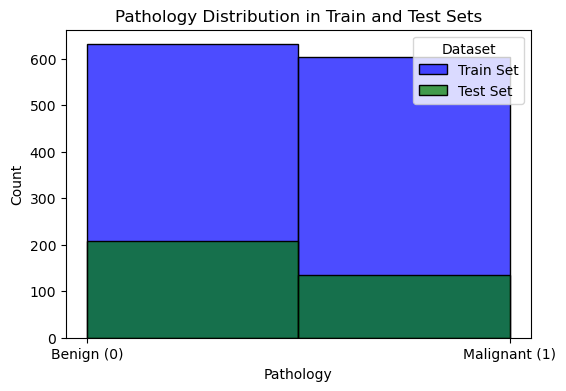

In [26]:
plt.figure(figsize=(6, 4))

# Plot for train set
sns.histplot(train_df['pathology'], bins=2, color='blue', kde=False, label='Train Set', alpha=0.7)

# Plot for test set
sns.histplot(test_df['pathology'], bins=2, color='green', kde=False, label='Test Set', alpha=0.7)

# Adding title and labels
plt.title('Pathology Distribution in Train and Test Sets', fontsize=12)
plt.xlabel('Pathology', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])

# Adding a legend
plt.legend(title='Dataset')

plt.show()

In [27]:
for col in categorical:
    df_group = train_df.groupby(col, observed=False).pathology.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_pathology_train
    df_group['risk'] = df_group['mean']/global_pathology_train
    display(df_group.sort_values(by='risk', ascending=False))
    print()

,mean,count,diff,risk
left_or_right_breast,,,,
LEFT,0.522538,599,0.033469,1.068434
RIGHT,0.457547,636,-0.031522,0.935548


,mean,count,diff,risk
image_view,,,,
CC,0.492147,573,0.003078,1.006293
MLO,0.486405,662,-0.002664,0.994553


,mean,count,diff,risk
mass_shape,,,,
IRREGULAR-ARCHITECTURAL_DISTORTION,0.941176,34,0.452108,1.924425
IRREGULAR,0.821958,337,0.332890,1.680660
ARCHITECTURAL_DISTORTION,0.650000,80,0.160931,1.329056
ASYMMETRIC_BREAST_TISSUE,0.400000,20,-0.089069,0.817881
LOBULATED,0.338983,295,-0.150086,0.693119
ROUND,0.333333,117,-0.155735,0.681567
OVAL,0.291667,312,-0.197402,0.596371
FOCAL_ASYMMETRIC_DENSITY,0.277778,18,-0.211291,0.567973
LYMPH_NODE,0.000000,22,-0.489069,0.000000


,mean,count,diff,risk
mass_margins,,,,
ILL_DEFINED-SPICULATED,0.884615,26,0.395547,1.808775
SPICULATED,0.879599,299,0.390530,1.798517
MICROLOBULATED,0.628319,113,0.139250,1.284724
ILL_DEFINED,0.623239,284,0.134171,1.274339
CIRCUMSCRIBED-ILL_DEFINED,0.481481,27,-0.007587,0.984486
OBSCURED,0.124378,201,-0.364691,0.254316
CIRCUMSCRIBED,0.112281,285,-0.376788,0.229581


In [28]:
from sklearn.metrics import mutual_info_score

def mutual_info_pathology_score(series):
    return mutual_info_score(series, train_df.pathology)

mi = train_df[categorical].apply(mutual_info_pathology_score)
mi = mi.sort_values(ascending=False).to_frame(name = 'MI')

display(mi)

,MI
mass_margins,0.226317
mass_shape,0.131722
left_or_right_breast,0.002112
image_view,0.000016


In [29]:
train_df = train_df.drop(columns=['image_view'], errors='ignore')
test_df = test_df.drop(columns=['image_view'], errors='ignore')
train_df.head() 

,breast_density,left_or_right_breast,abnormality_id,mass_shape,mass_margins,assessment,pathology,subtlety
0,3,LEFT,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,1,4
1,3,LEFT,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,1,4
2,3,LEFT,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,0,3
3,3,LEFT,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,0,3
4,3,RIGHT,1,OVAL,CIRCUMSCRIBED,4,0,5


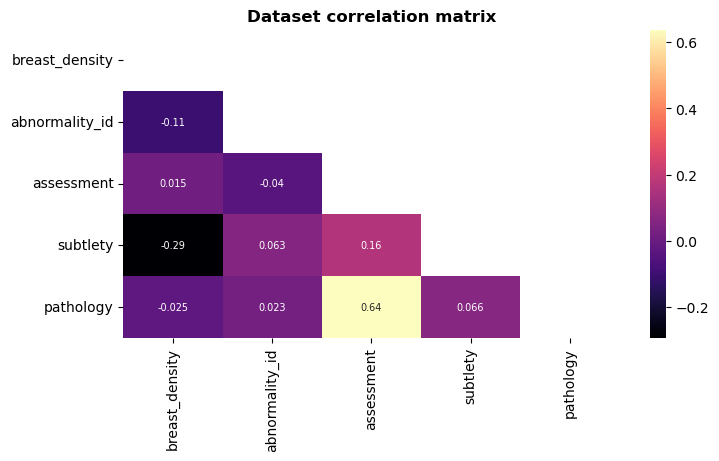

In [30]:
corr = train_df[numerical+['pathology']].corr(method = 'spearman')
plt.figure(figsize=(8, 4))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap = "magma", annot = True, annot_kws = {'size': 7})
plt.title("Dataset correlation matrix", fontsize = 12, fontweight = "bold")
plt.show()

In [31]:
scaler = MinMaxScaler()

train_df[numerical] = scaler.fit_transform(train_df[numerical])
test_df[numerical] = scaler.transform(test_df[numerical])

train_df['abnormality_id'].value_counts()

abnormality_id
0.0    1147
0.5      66
1.0      22
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(train_df, test_size = 0.2, random_state=1)


y_train = df_train['pathology']
y_val = df_val['pathology']
y_test = test_df['pathology']

del df_train['pathology']
del df_val['pathology']
del test_df['pathology']

In [33]:
# one hot encoding
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = test_df.to_dict(orient='records')
X_test = dv.transform(test_dicts)

Number of features: [[0.         0.8        0.33333333 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 1.         0.         1.        ]
 [0.         1.         0.33333333 ... 0.         0.         1.        ]
 ...
 [0.         0.8        0.33333333 ... 1.         0.         0.75      ]
 [0.         0.8        0.33333333 ... 0.         0.         0.        ]
 [0.         0.8        0.33333333 ... 0.         0.         0.75      ]]
Number of features: [[0.         1.         1.         ... 0.         0.         1.        ]
 [0.         1.         1.         ... 0.         0.         1.        ]
 [0.         0.8        0.33333333 ... 0.         1.         0.75      ]
 ...
 [0.         0.8        0.33333333 ... 0.         0.         0.25      ]
 [0.         1.         0.66666667 ... 0.         0.         0.75      ]
 [0.         1.         0.66666667 ... 0.         0.         0.75      ]]


Logistic Regression with hyperparameters tuning
I will perform hyperparameter tuning using GridSearchCV from sklearn library.

In [34]:
# Set the parameters dictionary
parameters = {
    "solver": ["liblinear"],
    "C": [0.01, 0.1, 0.5, 10],
    "penalty": ["l1", "l2"],
}

# Instantiate the model and classifier
log_reg = LogisticRegression()
clf = GridSearchCV(log_reg, parameters)

# Fit
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [35]:
clf.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [36]:
# Get the corresponding accuracy
clf.best_score_

0.8239142695995488

In [74]:
log_reg_best = LogisticRegression(C=10, penalty="l2", solver="liblinear")
log_reg_best.fit(X_train, y_train)

predicted_val = log_reg_best.predict(X_val)

In [75]:
roc_auc_score(y_val, predicted_val)

0.8295618522891249

In [76]:
predicted_test = log_reg_best.predict(X_test)

In [77]:
log_reg_roc_auc = roc_auc_score(y_test, predicted_test)
log_reg_roc_auc

0.7695850889095194

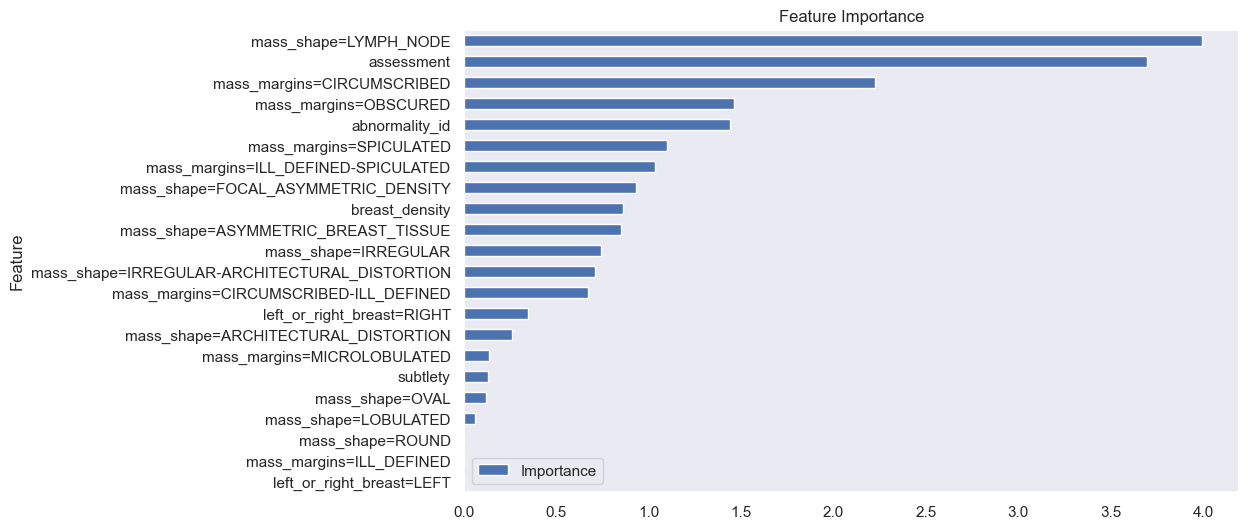

In [52]:
coefficients = log_reg_best.coef_[0]

feature_names = dv.get_feature_names_out()

feature_importance = pd.DataFrame(
    {"Feature": feature_names, "Importance": np.abs(coefficients)}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

Random Forest with hyperparameters tuning

In [53]:
# Set the parameters dictionary
parameters = {
    "n_estimators": [10, 50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2],
}

# Instantiate the model and classifier
random_forest = RandomForestClassifier()
clf_rf = GridSearchCV(random_forest, parameters)

# Fit
clf_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 50, 100, 200]})

In [54]:
clf_rf.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_split=3, n_estimators=50)

In [55]:
clf_rf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 50}

In [78]:
random_forest_best = RandomForestClassifier(
    n_estimators=50,
    criterion="gini",
    max_depth=3,
    min_samples_split=3,
    min_samples_leaf=1,
)
random_forest_best.fit(X_train, y_train)

predicted_val_rf = random_forest_best.predict(X_val)
roc_auc_score(y_val, predicted_val_rf)

0.7961760461760462

In [79]:
predicted_test_rf = random_forest_best.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, predicted_test_rf)
rf_roc_auc

0.7649967864029138

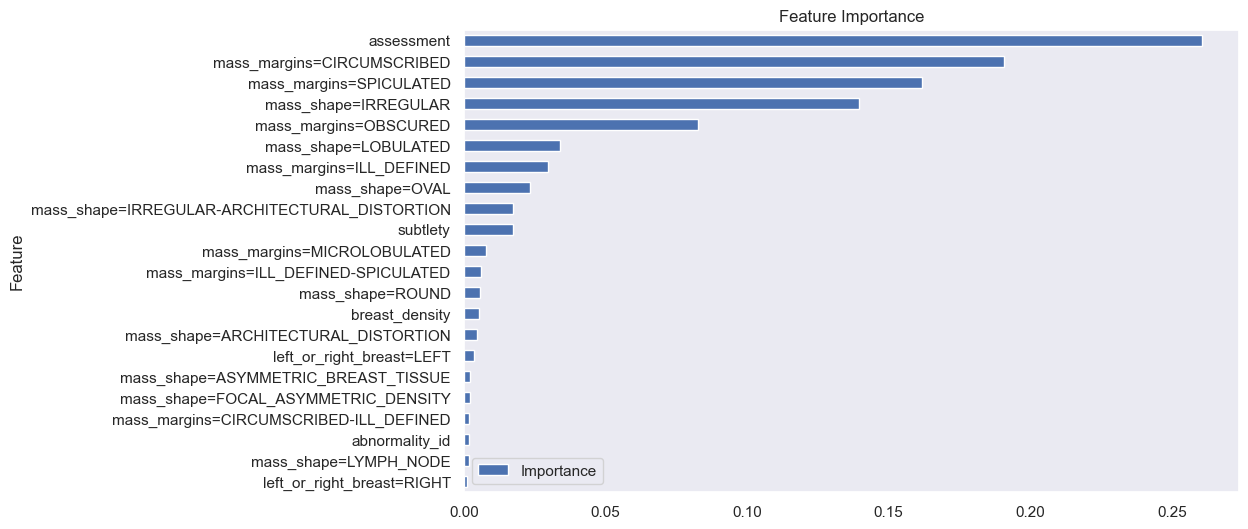

In [80]:
feature_names = dv.get_feature_names_out()

feature_importance = pd.DataFrame(
    {"Feature":  feature_names, "Importance": random_forest_best.feature_importances_}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

XGBoost with hyperparameters tuning

In [81]:
# Set the parameters dictionary
parameters = {
    "eta": [0.3, 0.5, 0.7],
    "max_depth": [1, 2, 3, 4],
    "min_child_weight": [1, 2, 3, 10, 15],
    "objective": ["binary:logistic"],
}

# Instantiate the model and classifier
xgb_classifier = XGBClassifier()
clf_xgb = GridSearchCV(xgb_classifier, parameters)

# Fit
clf_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.3, 0.5, 0.7], 'max_depth': [1, 2, 3, 4],
                         'min_child_weight': [1, 2, 3, 10, 15],
                         'objective': ['binary:logistic']})

In [82]:
clf_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [83]:
clf_xgb.best_params_

{'eta': 0.5,
 'max_depth': 4,
 'min_child_weight': 1,
 'objective': 'binary:logistic'}

In [84]:
clf_xgb.best_score_

0.8856432343741988

In [85]:
xgboost_best = XGBClassifier(eta=0.5, max_depth=4, min_child_weight=1)
xgboost_best.fit(X_train, y_train)

predicted_val_xgb = xgboost_best.predict(X_val)
roc_auc_score(y_val, predicted_val_xgb)

0.8089006952643315

In [88]:
predicted_test_xgb = xgboost_best.predict(X_test)
xgb_roc_auc = roc_auc_score(y_test, predicted_test_xgb)
xgb_roc_auc

0.7447154181246876

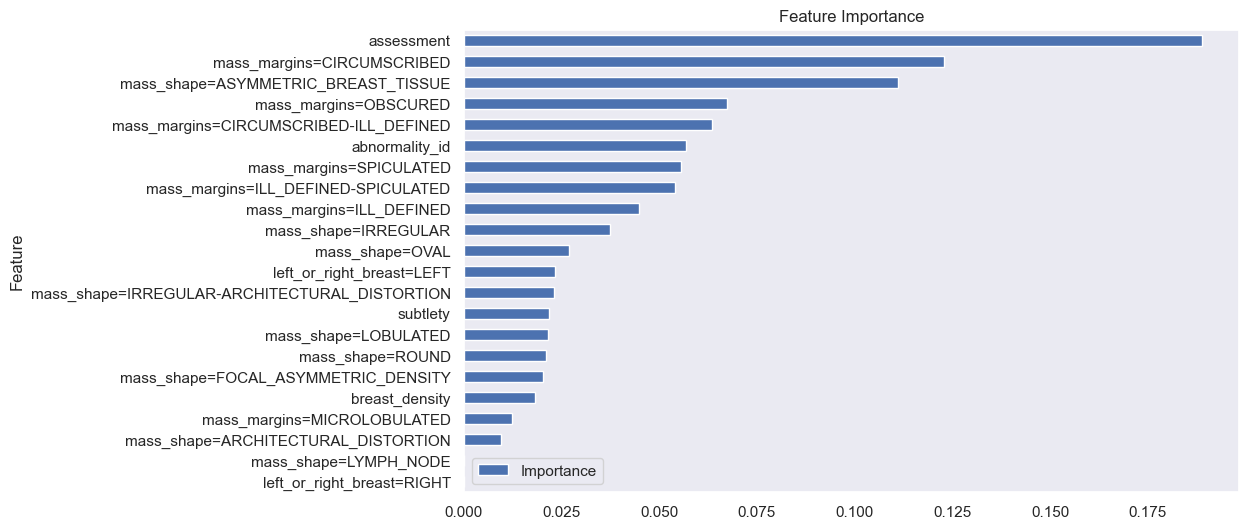

In [91]:
feature_names = dv.get_feature_names_out()

feature_importance = pd.DataFrame(
    {"Feature": feature_names, "Importance": xgboost_best.feature_importances_}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

In [92]:
roc_auc_dict = {
    "LogisticRegression": log_reg_roc_auc,
    "RandomForestClassifier": rf_roc_auc,
    "XGBoostClassifier": xgb_roc_auc,
}

In [93]:
roc_auc_dict

{'LogisticRegression': 0.7695850889095194,
 'RandomForestClassifier': 0.7649967864029138,
 'XGBoostClassifier': 0.7447154181246876}

In [42]:
scoring = 'accuracy'

# Define models to train
models= []
models.append(('LR', LogisticRegression(solver='liblinear', random_state=1,max_iter=500)))
models.append(('RandF', RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR Model:Mean accuracy is 0.821944 (Std accuracy is 0.035595)
RandF Model:Mean accuracy is 0.887631 (Std accuracy is 0.034308)
CART Model:Mean accuracy is 0.875500 (Std accuracy is 0.020820)
SVM Model:Mean accuracy is 0.831004 (Std accuracy is 0.034571)
NB Model:Mean accuracy is 0.796609 (Std accuracy is 0.031799)
KNN Model:Mean accuracy is 0.829015 (Std accuracy is 0.033965)


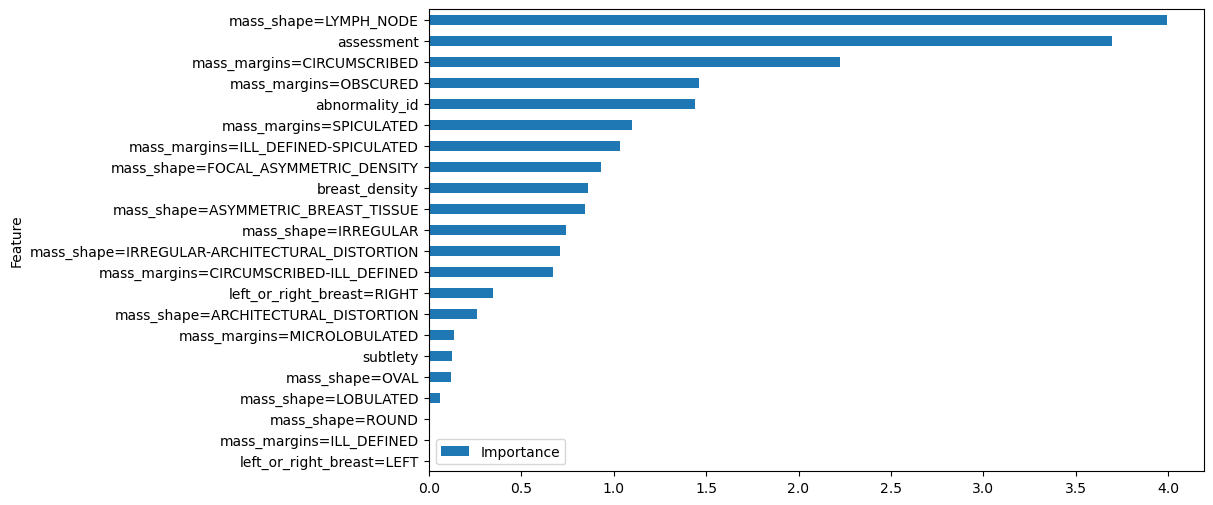

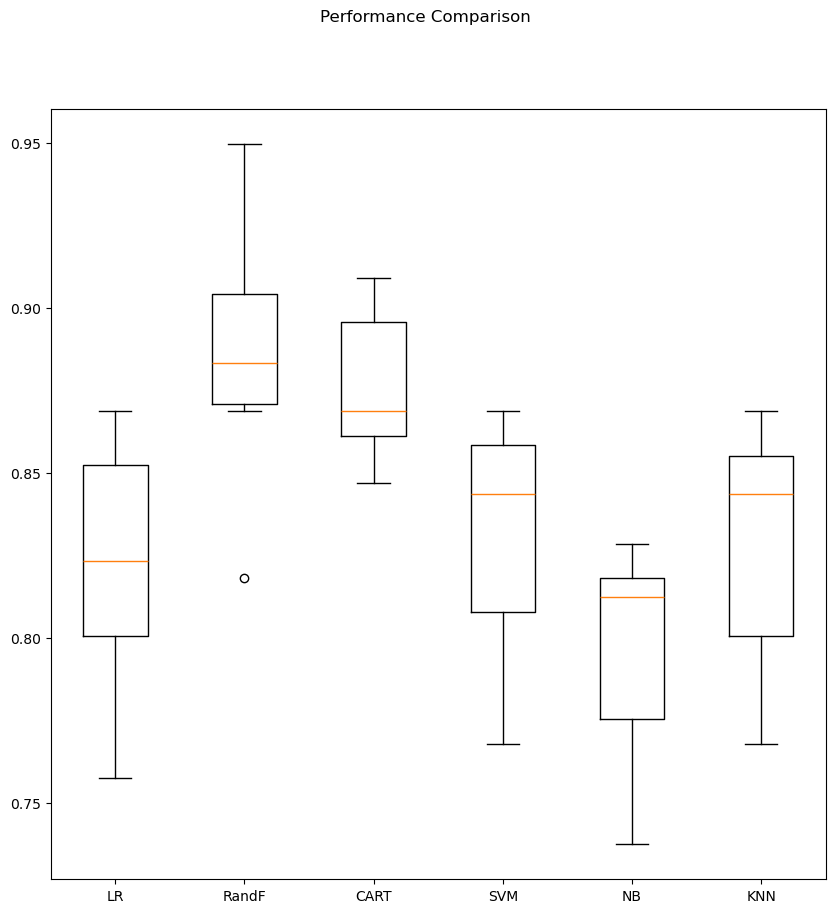

In [43]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [44]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(y_test, predictions))
    print("Classification report:\n",classification_report(y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 


Model: LR
Accuracy score: 0.7551020408163265
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.70      0.78       209
           1       0.64      0.84      0.73       134

    accuracy                           0.76       343
   macro avg       0.76      0.77      0.75       343
weighted avg       0.78      0.76      0.76       343


Model: RandF
Accuracy score: 0.7434402332361516
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       209
           1       0.66      0.69      0.68       134

    accuracy                           0.74       343
   macro avg       0.73      0.73      0.73       343
weighted avg       0.75      0.74      0.74       343


Model: CART
Accuracy score: 0.7521865889212828
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       209
           1       0.6

In [45]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.760932944606414


array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       209
           1       0.65      0.83      0.73       134

    accuracy                           0.76       343
   macro avg       0.76      0.77      0.76       343
weighted avg       0.78      0.76      0.76       343

Confusion matrix, without normalization
[[150  59]
 [ 23 111]]


In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
conv = y_pred > 0.5
(y_val == conv).mean()

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr,label='Logistic Regression (full model)')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [ ]:
roc_auc_score(y_val, y_pred)

In [ ]:
features_coefs = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
sorted_data = dict(sorted(features_coefs.items(), key=lambda item: abs(item[1]), reverse=True))
sorted_data

In [ ]:

rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

In [ ]:
y_pred_val_rf = rf.predict_proba(X_val)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_val_rf)
roc_auc_score(y_val, y_pred_val_rf)

In [ ]:
import xgboost as xgb

features = dv.get_feature_names_out().tolist() 
dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val_scaled, label=y_val, feature_names=features)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [ ]:
y_pred_xg = xgb_model.predict(dval)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_val, y_pred_xg)
roc_auc_score(y_val, y_pred_xg)